In [1]:
from google.colab import files
uploaded = files.upload()

Saving sample_image.jpg to sample_image.jpg


In [2]:
import matplotlib.pyplot as plt

In [3]:
import cv2

In [8]:
im = cv2.imread('sample_image.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(450, 900, 3)


<function matplotlib.pyplot.show>

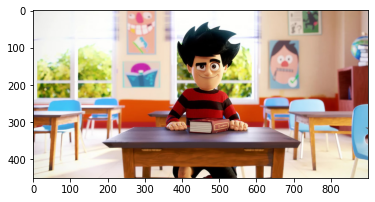

In [9]:
plt.imshow(im)
plt.show

In [15]:
import numpy as np

In [10]:
all_pixels = im.reshape((-1,3))

In [11]:
from sklearn.cluster import KMeans

In [12]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
centers = km.cluster_centers_

In [16]:
centers = np.array(centers,dtype='uint8')

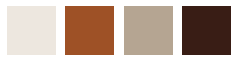

In [19]:
i = 1
plt.figure(0,figsize=(4,2))

colors = []
for each_col in centers:
  plt.subplot(1,4,i)
  plt.axis("Off")
  i+=1
  colors.append(each_col)


  #color swatch
  a = np.zeros((100,100,3),dtype='uint8')
  a[:,:,:] = each_col 
  plt.imshow(a)

plt.show()


In [20]:
new_img = np.zeros((450*900,3),dtype='uint8')
print(new_img.shape)

(405000, 3)


In [21]:
colors

[array([237, 231, 223], dtype=uint8),
 array([158,  81,  38], dtype=uint8),
 array([181, 165, 146], dtype=uint8),
 array([57, 29, 21], dtype=uint8)]

In [22]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

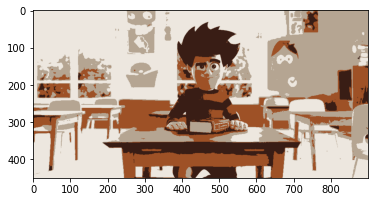

In [23]:
for ix in range(new_img.shape[0]):
  new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()